<a href="https://colab.research.google.com/github/JenyaPu/TurkuLife/blob/main/Turku_places.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this script we show how we can utilize the data on the upcoming events to integrate the interactive map into the app prototype created to inform Turku citizens and visitors on upcoming events.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Here we load a list of different types of events that were collected from different reliable sourses. Both APIs and requests are utilized to collect data and form the database (csv file in this demonstrative example).

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/turku_places.csv', delimiter=',')
turku_places = df.to_json(orient='records')
print(turku_places)

[{"id":0,"event_name":"Voimistelu","event_type":"Workout","time":"22.11.21 17:30","address":" \"Siutlankatu 1 20380 Turku\"","latitude":60.47348611,"longitude":22.31019611},{"id":1,"event_name":"Sibelius - The One And Only","event_type":"Exhibition","time":"25.11.21 18:00","address":"Piispankatu 17, Turku","latitude":60.45385709,"longitude":22.27754887},{"id":2,"event_name":"Club Rococo","event_type":"Theater","time":"12.12.21 11:00","address":"Linnankatu 80, Turku","latitude":60.43536617,"longitude":22.2296663},{"id":3,"event_name":"KULLERVO","event_type":"Theater","time":"13.12.21 11:00","address":"It\u00e4inen Rantak. 14, 20100 Turku","latitude":60.44621699,"longitude":22.26319286},{"id":4,"event_name":"Patricia Dom\u00ednguez\u2019s Green Irises","event_type":"Exhibition","time":"29.11.21 10:00","address":"It\u00e4inen Rantakatu 38, Turku","latitude":60.44504963,"longitude":22.26036613},{"id":5,"event_name":"Sauvakavely","event_type":"Sport","time":"27.11.21 19:30","address":"Halin

Map configuration. We define the types events, popup and on-click windows templates, color and label dictinaries.
Here you need to specify your Google Maps API. For more information: https://developers.google.com/maps/documentation/geocoding/get-api-key

In [ ]:
# !pip install gmaps
import gmaps
import json
from IPython.display import Javascript

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

keyFile = open('keys', 'r')
api_key = keyFile.readline().rstrip()
gmaps.configure(api_key=api_key)
figure_layout = {
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(map_type='ROADMAP', layout=figure_layout)

event_types = ['Workout', 'Exhibition', 'Theater', 'Exhibition', 'Sport',
               'Education', 'Event', 'Club', 'Hobby', 'Sauna']

info_box_template = """
<dl>
<dd>{event_name}</dd>
<dd>Time: {time}</dd>
<dd>Address:  {address}</dd>
</dt>
"""
info_box_short_template = """
{event_name}
Time: {time}
"""

color_dict={'Workout': '#FF0000',
 'Exhibition': '#AFEEEE',
 'Theater': '#DA70D6',
 'Sport': '#3CB371',
 'Education': '#191970',
 'Event': '#EE82EE',
 'Club': '#808080',
 'Hobby': '#F8F8FF',
 'Sauna': '#C71585',
 'Reserved': '#1E90FF'}

label_dict={'Workout': '💪',
 'Exhibition': '🎀',
 'Theater': '🎭',
 'Sport': '⛹️',
 'Education': '📚',
 'Event': '🎡',
 'Club': '🎲',
 'Hobby': '🎨',
 'Sauna': '💧',
 'Reserved': 'R'}

<IPython.core.display.Javascript object>

Here we show the information on the upcoming events and venues. Hovering mouse/finger next to the pointer shows the basic information, clicking on the event shows more details. Colors of dots / labels on pointers are selected according to event types.

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
turku_places_json = json.loads(turku_places)
place_info = [info_box_template.format(**place) for place in turku_places_json]
place_short_info = [info_box_short_template.format(**place) for place in turku_places_json]

for event in event_types:
  indices = df[df['event_type'] == event][['id']].squeeze(1).tolist()
  selected_place_info = [place_info[index] for index in indices]
  selected_place_short_info = [place_short_info[index] for index in indices]
  layer = gmaps.symbol_layer(
      df[df['event_type'] == event][['latitude', 'longitude']], fill_color='white',
      stroke_color=color_dict[event], scale=3, 
      hover_text=selected_place_short_info,
      info_box_content=selected_place_info, display_info_box=True
  )
  fig.add_layer(layer)
  layer = gmaps.marker_layer(df[df['event_type'] == event][['latitude', 'longitude']], label=label_dict[event])
  fig.add_layer(layer)
fig

<IPython.core.display.Javascript object>

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px'))

The image depicting th outcome of the above (in case no Google Maps API available).

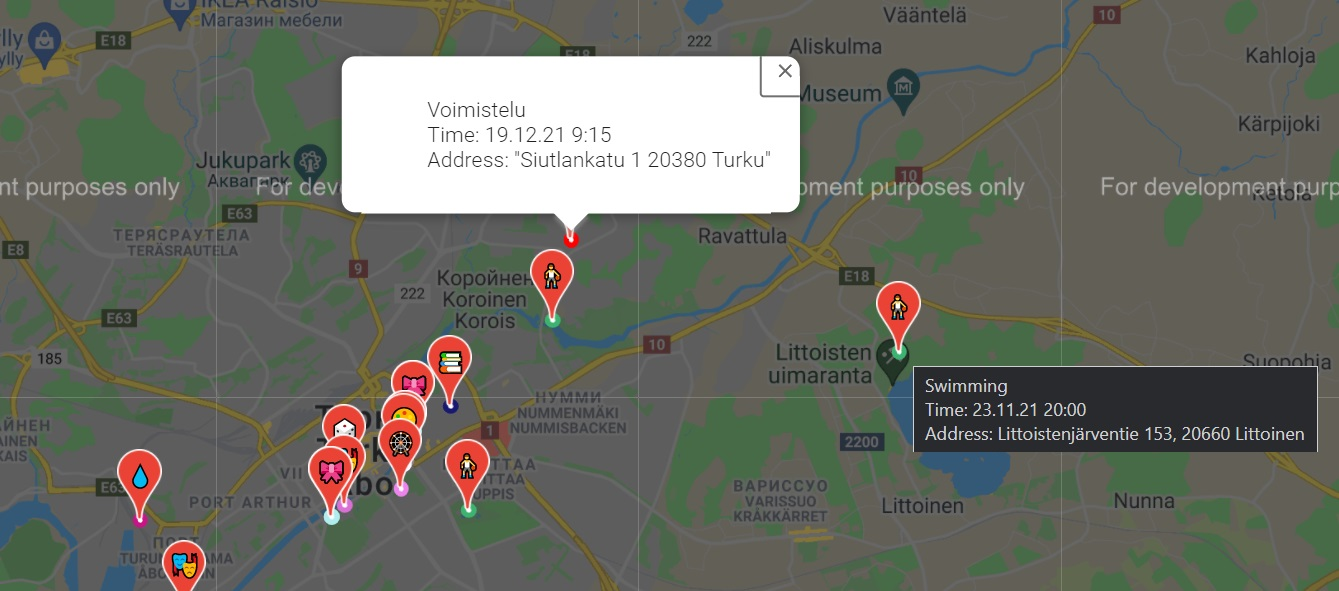